In [2]:
import pickle
import hdbscan
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (5, 5)

In [5]:
# load cluster embeddings
modelling_tsne_data_sentences50 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_sentence50.npy')
modelling_tsne_data_sentences100 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_sentence100.npy')
modelling_tsne_data_words50 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_word50.npy')
modelling_tsne_data_words100 = np.load('../Thesis/Final_models/tsne_dimred_embeddings_word100.npy')

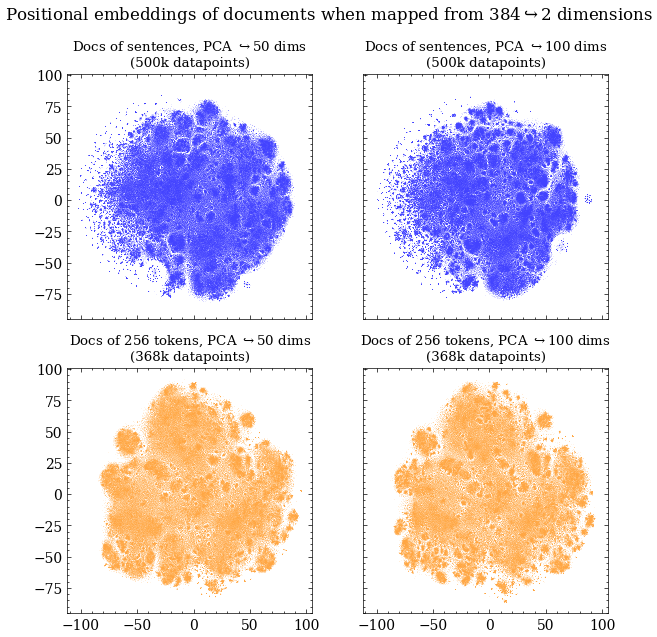

In [100]:
fig, axs = plt.subplots(2,2, figsize=(7,7), sharex=True, sharey=True)
plt.suptitle('Positional embeddings of documents when mapped from $384 \hookrightarrow 2$ dimensions', horizontalalignment='center')

sns.scatterplot(x = modelling_tsne_data_sentences50[:,0], y=modelling_tsne_data_sentences50[:,1], legend=False, s=0.05, ax=axs[0,0], color='blue')
sns.scatterplot(x = modelling_tsne_data_sentences100[:,0], y=modelling_tsne_data_sentences100[:,1], legend=False, s=0.05, ax=axs[0,1], color='blue')
sns.scatterplot(x = modelling_tsne_data_words50[:,0], y=modelling_tsne_data_words50[:,1], legend=False, s=0.05, ax=axs[1,0], color='darkorange')
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1], legend=False, s=0.05, ax=axs[1,1], color='darkorange')
axs[0,0].set_box_aspect(1)
axs[0,1].set_box_aspect(1)
axs[1,0].set_box_aspect(1)
axs[1,1].set_box_aspect(1)
plt.rcParams.update({'font.size': 8})  # decrease font size
axs[0,0].set_title("Docs of sentences, PCA $\hookrightarrow 50$ dims\n(500k datapoints)")
axs[0,1].set_title("Docs of sentences, PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
axs[1,0].set_title("Docs of 256 tokens, PCA $\hookrightarrow 50$ dims\n(368k datapoints)")
axs[1,1].set_title("Docs of 256 tokens, PCA $\hookrightarrow 100$ dims\n(368k datapoints)")
plt.rcParams.update({'font.size': 10})  # return to normal font size

plt.show()

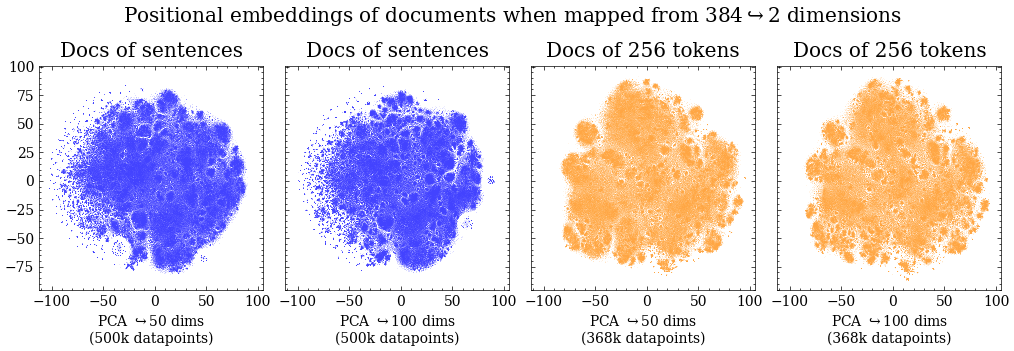

In [103]:
fig, axs = plt.subplots(1,4, figsize=(10, 3.5), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})  # increase font size
plt.suptitle('Positional embeddings of documents when mapped from $384 \hookrightarrow 2$ dimensions')

fig.tight_layout(pad =0)

sns.scatterplot(x = modelling_tsne_data_sentences50[:,0], y=modelling_tsne_data_sentences50[:,1], legend=False, s=0.05, ax=axs[0], color='blue')
sns.scatterplot(x = modelling_tsne_data_sentences100[:,0], y=modelling_tsne_data_sentences100[:,1], legend=False, s=0.05, ax=axs[1], color='blue')
sns.scatterplot(x = modelling_tsne_data_words50[:,0], y=modelling_tsne_data_words50[:,1], legend=False, s=0.05, ax=axs[2], color='darkorange')
sns.scatterplot(x = modelling_tsne_data_words100[:,0], y=modelling_tsne_data_words100[:,1], legend=False, s=0.05, ax=axs[3], color='darkorange')
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[2].set_box_aspect(1)
axs[3].set_box_aspect(1)

axs[0].set_title("Docs of sentences")
axs[1].set_title("Docs of sentences")
axs[2].set_title("Docs of 256 tokens")
axs[3].set_title("Docs of 256 tokens")

axs[0].set_xlabel("PCA $\hookrightarrow 50$ dims\n(500k datapoints)")
axs[1].set_xlabel("PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
axs[2].set_xlabel("PCA $\hookrightarrow 50$ dims\n(368k datapoints)")
axs[3].set_xlabel("PCA $\hookrightarrow 100$ dims\n(368k datapoints)")
plt.rcParams.update({'font.size': 10})  # decrease font size
plt.show()

In [35]:
# Plot scatters with hdbscan hue
with open('hdbscan_model.pkl', 'rb') as inp:
    hdbscan_model = pickle.load(inp)
len(hdbscan_model.labels_)

368835

In [36]:
# Plot scatters with hdbscan hue
with open('prediction_hdbscan_model.pkl', 'rb') as inp:
    long_hdbscan_model = pickle.load(inp)
len(long_hdbscan_model.labels_)

500000

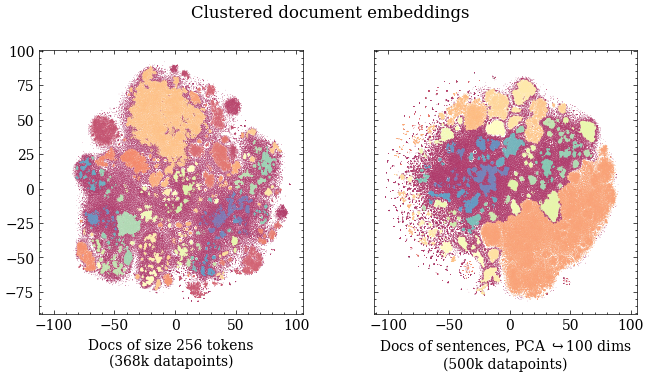

In [44]:
fig, axs = plt.subplots(1,2, figsize=(7,3.5), sharex=True, sharey=True)
plt.suptitle('Clustered document embeddings')
fig.tight_layout()

sns.scatterplot(x = modelling_tsne_data_words[:,0], y=modelling_tsne_data_words[:,1],\
                 hue=hdbscan_model.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[0])
sns.scatterplot(x = modelling_tsne_data_sentences[:,0], y=modelling_tsne_data_sentences[:,1],\
                 hue=long_hdbscan_model.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[1])
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[0].set_xlabel("Docs of size 256 tokens\n(368k datapoints)")
axs[1].set_xlabel("Docs of sentences, PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
plt.show()